In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [2]:
pip install lime


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data1 = pd.read_csv('C:\\Users\\ThinGF63\\Maternal Health Risk Data Set.csv')
data1

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
data1.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [5]:
data2 = pd.read_csv('C:\\Users\\ThinGF63\\data hamil jabar.csv')
data2

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016
...,...,...,...,...,...,...,...,...
184,185,32,JAWA BARAT,3275,KOTA BEKASI,54212,ORANG,2022
185,186,32,JAWA BARAT,3276,KOTA DEPOK,47022,ORANG,2022
186,187,32,JAWA BARAT,3277,KOTA CIMAHI,10570,ORANG,2022
187,188,32,JAWA BARAT,3278,KOTA TASIKMALAYA,11705,ORANG,2022


In [6]:
data2.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_ibu_hamil,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,35401.751323,2019.000000
std,54.703748,0.0,31.284725,27281.827540,2.005312
min,1.000000,32.0,3201.000000,2966.000000,2016.000000
25%,48.000000,32.0,3207.000000,17789.000000,2017.000000
50%,95.000000,32.0,3214.000000,29638.000000,2019.000000
75%,142.000000,32.0,3273.000000,46972.000000,2021.000000
max,189.000000,32.0,3279.000000,128743.000000,2022.000000


### PENGELOMPOKKAN DATA

In [7]:
subset_data1 = data1[['Age']]
umur1 = subset_data1[(subset_data1['Age'] >= 15) & (subset_data1['Age'] <= 19)]
umur1

,Age
11,19
15,15
23,18
25,16
26,19
...,...
989,17
990,19
992,17
1005,17


In [8]:
subset_data1 = data1[['Age']]
umur2 = subset_data1[(subset_data1['Age'] >= 20) & (subset_data1['Age'] <= 24)]
umur2

,Age
5,23
6,23
10,23
13,20
22,21
...,...
939,21
945,22
947,23
950,23


In [9]:
subset_data1 = data1[['Age']]
umur3 = subset_data1[(subset_data1['Age'] >= 25) & (subset_data1['Age'] <= 28)]
umur3

,Age
0,25
12,25
17,25
29,28
42,25
...,...
971,28
981,25
984,28
988,25


In [10]:
subset_data1 = data1[['Age']]
umur4 = subset_data1[(subset_data1['Age'] >= 29) & (subset_data1['Age'] <= 33)]
umur4

,Age
2,29
3,30
8,32
18,30
43,30
...,...
977,30
978,29
985,32
995,32


In [11]:
subset_data1 = data1[['Age']]
umur5 = subset_data1[(subset_data1['Age'] >= 34) & (subset_data1['Age'] <= 38)]
umur5

,Age
1,35
4,35
7,35
39,35
52,35
...,...
958,37
964,35
991,37
997,35


In [12]:
subset_data1 = data1[['Age']]
umur6 = subset_data1[(subset_data1['Age'] >= 39) & (subset_data1['Age'] <= 43)]
umur6

,Age
9,42
20,40
46,42
57,42
108,42
...,...
983,40
994,40
999,40
1007,40


In [13]:
subset_data1 = data1[['Age']]
umur7 = subset_data1[(subset_data1['Age'] >= 44) & (subset_data1['Age'] <= 48)]
umur7

,Age
14,48
38,45
74,44
102,48
120,48
129,48
186,45
206,48
228,48
282,45


In [14]:
X = data1['Age'].values.reshape(-1, 1)
y = data1[['SystolicBP', 'DiastolicBP']]
X, y

(array([[25],
        [35],
        [29],
        ...,
        [35],
        [43],
        [32]], dtype=int64),
       SystolicBP  DiastolicBP
 0            130           80
 1            140           90
 2             90           70
 3            140           85
 4            120           60
 ...          ...          ...
 1009         120           60
 1010         120           90
 1011          85           60
 1012         120           90
 1013         120           65
 
 [1014 rows x 2 columns])

### PREPROCESSING

In [15]:
maternal = pd.read_csv('C:\\Users\\ThinGF63\\combined_data.csv')

In [16]:
#missing value data1
missing_values_numeric = data1.select_dtypes(include='number').isna().sum()
print("Missing values for numeric columns:")
print(missing_values_numeric)


Missing values for numeric columns:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
dtype: int64


In [17]:
#missing value data2
missing_values_numeric = data2.select_dtypes(include='number').isna().sum()
print("Missing values for numeric columns:")
print(missing_values_numeric)


Missing values for numeric columns:
id                     0
kode_provinsi          0
kode_kabupaten_kota    0
jumlah_ibu_hamil       0
tahun                  0
dtype: int64


In [18]:
X = data1[['Age']]
y = data1[['SystolicBP', 'DiastolicBP', 'HeartRate']]

# Mendapatkan jumlah sampel dan fitur untuk X
n_samples_X, n_features_X = X.shape
print(f"X memiliki {n_samples_X} sampel dan {n_features_X} fitur.")

# Mendapatkan jumlah sampel dan fitur untuk y
n_samples_y, n_features_y = y.shape
print(f"y memiliki {n_samples_y} sampel dan {n_features_y} fitur.")

X memiliki 1014 sampel dan 1 fitur.
y memiliki 1014 sampel dan 3 fitur.


In [19]:
from sklearn.model_selection import train_test_split
# Memisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)

X_train:
     Age
847   30
332   23
707   32
218   31
425   35
..   ...
106   50
270   22
860   17
435   65
102   48

[811 rows x 1 columns]
X_test:
     Age
752   29
519   30
210   50
611   23
914   17
..   ...
370   21
381   23
780   60
760   21
682   25

[203 rows x 1 columns]
y_train:
     SystolicBP  DiastolicBP  HeartRate
847         120           80         76
332         130           70         70
707         120           90         70
218         120           60         76
425         100           60         80
..          ...          ...        ...
106         140           90         90
270         120           90         82
860          90           63         70
435         130           80         86
102         140           90         90

[811 rows x 3 columns]
y_test:
     SystolicBP  DiastolicBP  HeartRate
752         130           70         78
519         140          100         70
210         140           95         60
611         120           90         6

In [20]:
### keseimbangan data 1
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

# Memuat dataset contoh
X = data1[['Age']]
y = data1[['SystolicBP', 'DiastolicBP', 'HeartRate']]

# Memisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan kolom target untuk memeriksa distribusi unik dari kombinasi
y_combined = y.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print("Distribusi kelas dalam y_combined:", Counter(y_combined))


Distribusi kelas dalam y_combined: Counter({'120_80_70': 100, '120_90_70': 44, '120_80_76': 39, '85_60_86': 35, '130_70_78': 32, '120_60_76': 25, '90_60_76': 25, '120_80_88': 25, '120_75_70': 22, '120_85_60': 22, '120_90_80': 22, '140_100_66': 20, '90_70_80': 17, '140_100_80': 15, '76_49_77': 14, '90_65_77': 14, '100_70_80': 13, '120_90_60': 13, '120_80_66': 13, '120_90_82': 12, '90_65_80': 12, '140_90_90': 11, '100_85_66': 10, '120_80_77': 10, '160_100_77': 10, '140_95_77': 10, '90_65_76': 9, '120_80_75': 9, '100_70_60': 9, '140_100_70': 9, '140_90_88': 9, '120_95_80': 9, '130_100_75': 9, '90_65_67': 9, '140_80_70': 8, '140_100_90': 8, '90_60_70': 8, '120_75_66': 8, '90_63_70': 8, '90_60_66': 8, '70_50_70': 7, '100_65_70': 7, '120_90_77': 7, '90_60_82': 7, '100_90_88': 7, '100_65_66': 7, '120_95_66': 7, '100_70_66': 7, '120_85_88': 7, '100_65_80': 7, '140_100_78': 7, '90_60_60': 7, '90_65_70': 7, '140_90_70': 6, '130_80_70': 6, '120_90_88': 6, '110_75_76': 6, '100_50_70': 6, '80_60_80

In [21]:
# convert kolom RiskLevel dari string ke integer
mapping = {'high risk': 1, 'mid risk': 2, 'low risk': 3}
data1['RiskLevel'] = data1['RiskLevel'].map(mapping)

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = data1[['Age']]
y = data1[['SystolicBP', 'DiastolicBP', 'HeartRate', 'RiskLevel']]

# Memisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengonversi target menjadi kategori untuk klasifikasi
y_categorized = y.apply(lambda col: pd.cut(col, bins=3, labels=False))

# Definisikan model
model = LogisticRegression(max_iter=1000)

# Hitung jumlah anggota terkecil dalam kelas target (y)
leastPopulated = min([y_categorized[col].value_counts().min() for col in y_categorized.columns])

# Inisialisasi daftar untuk menyimpan F1 score di setiap fold
f1_scores = []

# Lakukan cross-validation untuk setiap lipatan (fold)
for fold in range(2, leastPopulated + 1):
    f1_scores_fold = []
    for col in y_categorized.columns:
        skf = StratifiedKFold(n_splits=fold)
        fOne = cross_val_score(model, X, y_categorized[col], cv=skf, scoring='f1_weighted')
        avg_f1_score = np.mean(fOne)
        f1_scores_fold.append((col, fold, avg_f1_score, fOne))
    f1_scores.append(f1_scores_fold)

# Cetak hasil
for fold_scores in f1_scores:
    for col, fold, avg_f1_score, fOne in fold_scores:
        print(f"\nAverage F1 score for column '{col}' with {fold} folds: {avg_f1_score:.4f}")
        for i, score in enumerate(fOne):
            print(f"  Fold {i + 1}: F1 score = {score:.4f}")



Average F1 score for column 'SystolicBP' with 2 folds: 0.5559
  Fold 1: F1 score = 0.5028
  Fold 2: F1 score = 0.6090

Average F1 score for column 'DiastolicBP' with 2 folds: 0.4513
  Fold 1: F1 score = 0.4572
  Fold 2: F1 score = 0.4454

Average F1 score for column 'HeartRate' with 2 folds: 0.8890
  Fold 1: F1 score = 0.8890
  Fold 2: F1 score = 0.8890

Average F1 score for column 'RiskLevel' with 2 folds: 0.3393
  Fold 1: F1 score = 0.3622
  Fold 2: F1 score = 0.3163


In [23]:
data2

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016
...,...,...,...,...,...,...,...,...
184,185,32,JAWA BARAT,3275,KOTA BEKASI,54212,ORANG,2022
185,186,32,JAWA BARAT,3276,KOTA DEPOK,47022,ORANG,2022
186,187,32,JAWA BARAT,3277,KOTA CIMAHI,10570,ORANG,2022
187,188,32,JAWA BARAT,3278,KOTA TASIKMALAYA,11705,ORANG,2022


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter


# Memilih kolom yang akan digunakan
X = data2[['kode_provinsi', 'kode_kabupaten_kota']]
y = data2[['jumlah_ibu_hamil']]

# Gabungkan kolom target untuk memeriksa distribusi unik dari kombinasi
y_combined = y.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print("Distribusi kelas dalam y_combined:", Counter(y_combined))

# Pisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)


Distribusi kelas dalam y_combined: Counter({'46972': 2, '126474': 1, '51056': 1, '46284': 1, '79912': 1, '62514': 1, '33470': 1, '20383': 1, '20156': 1, '53689': 1, '21778': 1, '20684': 1, '43102': 1, '35351': 1, '19976': 1, '46520': 1, '73617': 1, '32807': 1, '6720': 1, '21324': 1, '6535': 1, '46628': 1, '5960': 1, '55682': 1, '46096': 1, '11875': 1, '13097': 1, '4307': 1, '127203': 1, '50252': 1, '79789': 1, '57424': 1, '32844': 1, '19664': 1, '19839': 1, '40953': 1, '21403': 1, '20023': 1, '30418': 1, '27302': 1, '19831': 1, '46060': 1, '80227': 1, '34933': 1, '6601': 1, '21205': 1, '6461': 1, '45191': 1, '5897': 1, '56143': 1, '46840': 1, '11801': 1, '12878': 1, '3304': 1, '127781': 1, '51182': 1, '79612': 1, '61051': 1, '32657': 1, '23350': 1, '19514': 1, '50176': 1, '21020': 1, '19631': 1, '29942': 1, '35848': 1, '19662': 1, '45558': 1, '81869': 1, '34613': 1, '6478': 1, '21113': 1, '6381': 1, '44422': 1, '5834': 1, '56551': 1, '47550': 1, '11713': 1, '13265': 1, '3238': 1, '1282

In [25]:
### keseimbangan data 2
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# Memuat dataset contoh
X = data2[['kode_provinsi', 'kode_kabupaten_kota']]
y = data2[['jumlah_ibu_hamil']]

# Gabungkan kolom target untuk memeriksa distribusi unik dari kombinasi
y_combined = y.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print("Distribusi kelas dalam y_combined:", Counter(y_combined))


Distribusi kelas dalam y_combined: Counter({'46972': 2, '126474': 1, '51056': 1, '46284': 1, '79912': 1, '62514': 1, '33470': 1, '20383': 1, '20156': 1, '53689': 1, '21778': 1, '20684': 1, '43102': 1, '35351': 1, '19976': 1, '46520': 1, '73617': 1, '32807': 1, '6720': 1, '21324': 1, '6535': 1, '46628': 1, '5960': 1, '55682': 1, '46096': 1, '11875': 1, '13097': 1, '4307': 1, '127203': 1, '50252': 1, '79789': 1, '57424': 1, '32844': 1, '19664': 1, '19839': 1, '40953': 1, '21403': 1, '20023': 1, '30418': 1, '27302': 1, '19831': 1, '46060': 1, '80227': 1, '34933': 1, '6601': 1, '21205': 1, '6461': 1, '45191': 1, '5897': 1, '56143': 1, '46840': 1, '11801': 1, '12878': 1, '3304': 1, '127781': 1, '51182': 1, '79612': 1, '61051': 1, '32657': 1, '23350': 1, '19514': 1, '50176': 1, '21020': 1, '19631': 1, '29942': 1, '35848': 1, '19662': 1, '45558': 1, '81869': 1, '34613': 1, '6478': 1, '21113': 1, '6381': 1, '44422': 1, '5834': 1, '56551': 1, '47550': 1, '11713': 1, '13265': 1, '3238': 1, '1282

In [26]:
#KESEIMBANGAN DATA 2

X = data2[['kode_provinsi', 'kode_kabupaten_kota']]
y = data2[['jumlah_ibu_hamil', 'tahun']]

# Mengonversi target menjadi kategori untuk klasifikasi
y_categorized = y.apply(lambda col: pd.cut(col, bins=3, labels=False))

# Definisikan model
model = LogisticRegression()
f1_scores_fold = []
fold = 2

for col in y_categorized.columns:
    skf = StratifiedKFold(n_splits=fold)
    # Pastikan X adalah DataFrame dan y adalah Series
    if isinstance(X, pd.Series):
        X = X.to_frame()
    if isinstance(y_categorized[col], pd.DataFrame):
        y_categorized[col] = y_categorized[col].squeeze()

    fOne = cross_val_score(model, X, y_categorized[col], cv=skf, scoring='f1_weighted')
    avg_f1_score = np.mean(fOne)
    f1_scores_fold.append(fOne)
    print(f"Average F1 score for column '{col}': {avg_f1_score:.3f}")
    for i, score in enumerate(fOne):
        print(f"Fold {i + 1}: F1 score = {score:.3f}")

# Opsional: mencetak hasil keseluruhan untuk setiap kolom
for col, scores in zip(y_categorized.columns, f1_scores_fold):
    print(f"\nF1 scores for '{col}':")
    for i, score in enumerate(scores):
        print(f"Fold {i + 1}: F1 score = {score:.3f}")


c:\Users\ThinGF63\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ThinGF63\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Average F1 score for column 'jumlah_ibu_hamil': 0.547
Fold 1: F1 score = 0.542
Fold 2: F1 score = 0.552
Average F1 score for column 'tahun': 0.271
Fold 1: F1 score = 0.260
Fold 2: F1 score = 0.282

F1 scores for 'jumlah_ibu_hamil':
Fold 1: F1 score = 0.542
Fold 2: F1 score = 0.552

F1 scores for 'tahun':
Fold 1: F1 score = 0.260
Fold 2: F1 score = 0.282


In [27]:
maternal = pd.read_csv('C:\\Users\\ThinGF63\\combined_data.csv')
maternal

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,25,130,80,15.0,98.0,86,high risk,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,35,140,90,13.0,98.0,70,high risk,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,29,90,70,8.0,100.0,80,high risk,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,30,140,85,7.0,98.0,70,high risk,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,35,120,60,6.1,98.0,76,low risk,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,JAWA BARAT,3211,KABUPATEN SUMEDANG,19631,ORANG,2018
1010,55,120,90,18.0,98.0,60,high risk,JAWA BARAT,3212,KABUPATEN INDRAMAYU,29942,ORANG,2018
1011,35,85,60,19.0,98.0,86,high risk,JAWA BARAT,3213,KABUPATEN SUBANG,35848,ORANG,2018
1012,43,120,90,18.0,98.0,70,high risk,JAWA BARAT,3214,KABUPATEN PURWAKARTA,19662,ORANG,2018


In [28]:
#combined data
combined_data = pd.concat([data1, data2], ignore_index=True)

print("Merging Result:")
print(combined_data)


Merging Result:
       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0     25.0       130.0         80.0  15.0      98.0       86.0        1.0   
1     35.0       140.0         90.0  13.0      98.0       70.0        1.0   
2     29.0        90.0         70.0   8.0     100.0       80.0        1.0   
3     30.0       140.0         85.0   7.0      98.0       70.0        1.0   
4     35.0       120.0         60.0   6.1      98.0       76.0        3.0   
...    ...         ...          ...   ...       ...        ...        ...   
1198   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1199   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1200   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1201   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1202   NaN         NaN          NaN   NaN       NaN        NaN        NaN   

         id  kode_provinsi nama_provinsi  kode_kabupaten_ko

In [29]:
# melihat missing value
missing_values_numeric = maternal.select_dtypes(include='number').isna().sum()
print("Missing values for numeric columns:")
print(missing_values_numeric)


Missing values for numeric columns:
Age                    0
SystolicBP             0
DiastolicBP            0
BS                     0
BodyTemp               0
HeartRate              0
kode_kabupaten_kota    0
jumlah_ibu_hamil       0
tahun                  0
dtype: int64


In [30]:
maternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1014 non-null   int64  
 1   SystolicBP           1014 non-null   int64  
 2   DiastolicBP          1014 non-null   int64  
 3   BS                   1014 non-null   float64
 4   BodyTemp             1014 non-null   float64
 5   HeartRate            1014 non-null   int64  
 6   RiskLevel            1014 non-null   object 
 7   nama_provinsi        1014 non-null   object 
 8   kode_kabupaten_kota  1014 non-null   int64  
 9   nama_kabupaten_kota  1014 non-null   object 
 10  jumlah_ibu_hamil     1014 non-null   int64  
 11  satuan               1014 non-null   object 
 12  tahun                1014 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 103.1+ KB


In [31]:
# convert kolom RiskLevel dari string ke integer
mapping = {'high risk': 1, 'mid risk': 2, 'low risk': 3}
maternal['RiskLevel'] = maternal['RiskLevel'].map(mapping)

In [32]:
maternal

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,25,130,80,15.0,98.0,86,1,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,35,140,90,13.0,98.0,70,1,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,29,90,70,8.0,100.0,80,1,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,30,140,85,7.0,98.0,70,1,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,35,120,60,6.1,98.0,76,3,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,JAWA BARAT,3211,KABUPATEN SUMEDANG,19631,ORANG,2018
1010,55,120,90,18.0,98.0,60,1,JAWA BARAT,3212,KABUPATEN INDRAMAYU,29942,ORANG,2018
1011,35,85,60,19.0,98.0,86,1,JAWA BARAT,3213,KABUPATEN SUBANG,35848,ORANG,2018
1012,43,120,90,18.0,98.0,70,1,JAWA BARAT,3214,KABUPATEN PURWAKARTA,19662,ORANG,2018


In [33]:
# keseimbangan data setelah digabungkan kedua datanya
# KESEIMBANGAN DATA 2

X = maternal['RiskLevel']
y = maternal[['Age', 'jumlah_ibu_hamil', 'SystolicBP', 'DiastolicBP', 'kode_kabupaten_kota', 'tahun', 'HeartRate']]


# Mengonversi target menjadi kategori untuk klasifikasi
y_categorized = y.apply(lambda col: pd.cut(col, bins=3, labels=False))

model = LogisticRegression()
f1_scores_fold = []
fold = 2

for col in y_categorized.columns:
    skf = StratifiedKFold(n_splits=fold)
    # Pastikan X adalah DataFrame dan y adalah Series
    if isinstance(X, pd.Series):
        X = X.to_frame()
    if isinstance(y_categorized[col], pd.DataFrame):
        y_categorized[col] = y_categorized[col].squeeze()

    fOne = cross_val_score(model, X, y_categorized[col], cv=skf, scoring='f1_weighted')
    avg_f1_score = np.mean(fOne)
    f1_scores_fold.append(fOne)
    print(f"Average F1 score for column '{col}': {avg_f1_score:.4f}")
    for i, score in enumerate(fOne):
        print(f"Fold {i + 1}: F1 score = {score:.4f}")

# Opsional: mencetak hasil keseluruhan untuk setiap kolom
for col, scores in zip(y_categorized.columns, f1_scores_fold):
    print(f"\nF1 scores for '{col}':")
    for i, score in enumerate(scores):
        print(f"Fold {i + 1}: F1 score = {score:.4f}")


Average F1 score for column 'Age': 0.6110
Fold 1: F1 score = 0.6251
Fold 2: F1 score = 0.5969
Average F1 score for column 'jumlah_ibu_hamil': 0.5397
Fold 1: F1 score = 0.5384
Fold 2: F1 score = 0.5409
Average F1 score for column 'SystolicBP': 0.4532
Fold 1: F1 score = 0.4485
Fold 2: F1 score = 0.4578
Average F1 score for column 'DiastolicBP': 0.3759
Fold 1: F1 score = 0.3715
Fold 2: F1 score = 0.3803
Average F1 score for column 'kode_kabupaten_kota': 0.5397
Fold 1: F1 score = 0.5409
Fold 2: F1 score = 0.5384
Average F1 score for column 'tahun': 0.3074
Fold 1: F1 score = 0.3169
Fold 2: F1 score = 0.2978
Average F1 score for column 'HeartRate': 0.8890
Fold 1: F1 score = 0.8890
Fold 2: F1 score = 0.8890

F1 scores for 'Age':
Fold 1: F1 score = 0.6251
Fold 2: F1 score = 0.5969

F1 scores for 'jumlah_ibu_hamil':
Fold 1: F1 score = 0.5384
Fold 2: F1 score = 0.5409

F1 scores for 'SystolicBP':
Fold 1: F1 score = 0.4485
Fold 2: F1 score = 0.4578

F1 scores for 'DiastolicBP':
Fold 1: F1 score =

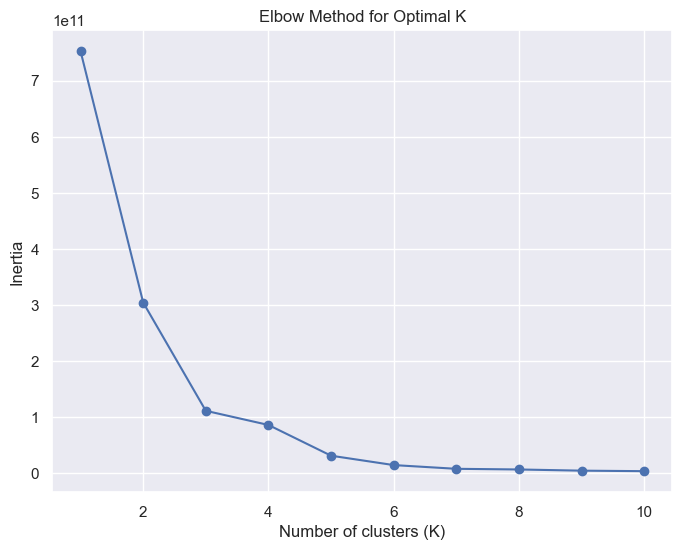

In [34]:
# elbow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X = maternal[['Age', 'jumlah_ibu_hamil', 'SystolicBP', 'DiastolicBP', 'kode_kabupaten_kota', 'tahun', 'RiskLevel', 'HeartRate']]

# Menentukan rentang nilai K yang akan diuji
K = range(1, 11)

# Menyimpan inertia untuk setiap nilai K
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


### Model Validation

In [35]:
## apply kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

optimal_cluster = 4  

# Skala data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Definisikan model K-means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_cluster, random_state=42)

# Fit model dan prediksi klaster, kemudian simpan hasilnya di dataframe X
X['cluster'] = kmeans.fit_predict(scaled_X)

X


C:\Users\ThinGF63\AppData\Local\Temp\ipykernel_17244\22254723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(scaled_X)


,Age,jumlah_ibu_hamil,SystolicBP,DiastolicBP,kode_kabupaten_kota,tahun,RiskLevel,HeartRate,cluster
0,25,126474,130,80,3201,2016,1,86,0
1,35,51056,140,90,3202,2016,1,70,3
2,29,46284,90,70,3203,2016,1,80,1
3,30,79912,140,85,3204,2016,1,70,3
4,35,62514,120,60,3205,2016,3,76,0
...,...,...,...,...,...,...,...,...,...
1009,22,19631,120,60,3211,2018,1,80,1
1010,55,29942,120,90,3212,2018,1,60,3
1011,35,35848,85,60,3213,2018,1,86,1
1012,43,19662,120,90,3214,2018,1,70,3


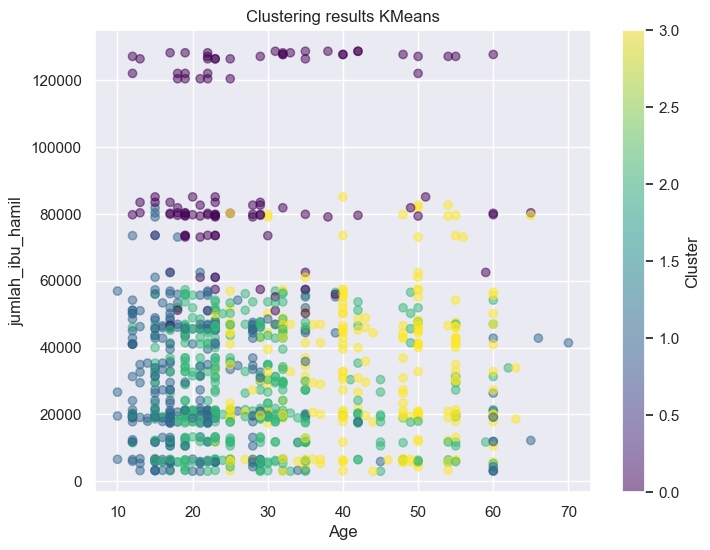

In [36]:
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose two features for visualization
feature1 = 'Age'
feature2 = 'jumlah_ibu_hamil'

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering results KMeans')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster')
plt.show()

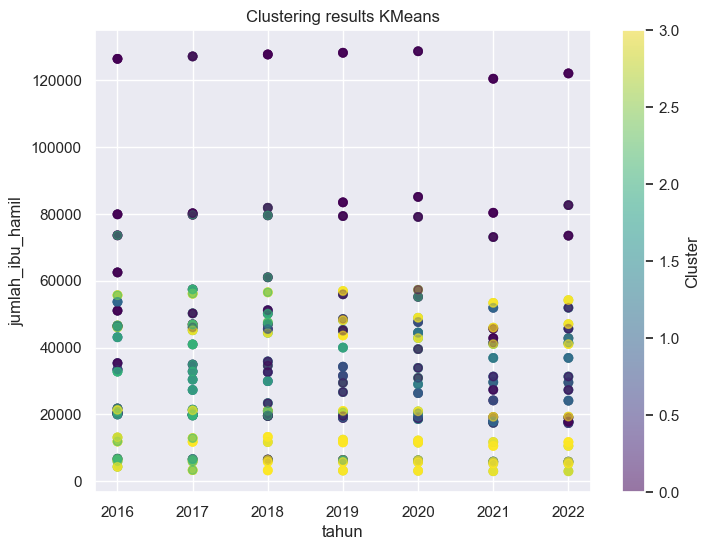

In [37]:
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose two features for visualization
feature1 = 'tahun'
feature2 = 'jumlah_ibu_hamil'

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering results KMeans')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster')
plt.show()

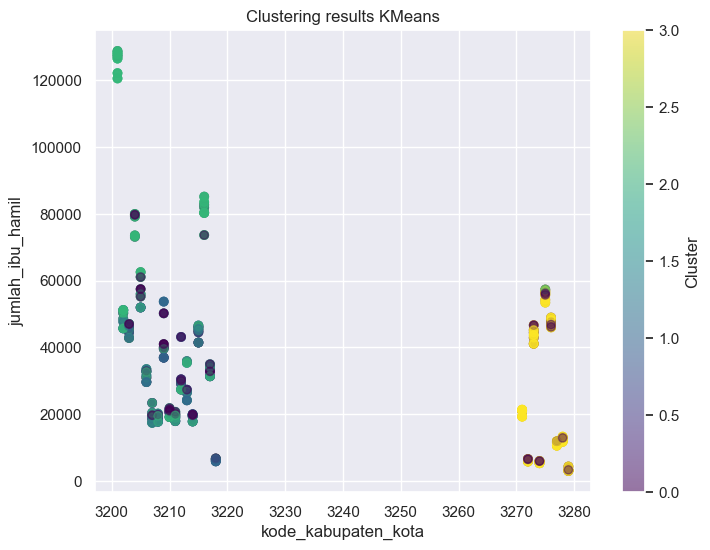

In [38]:
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose two features for visualization
feature1 = 'kode_kabupaten_kota'
feature2 = 'jumlah_ibu_hamil'

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering results KMeans')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster')
plt.show()

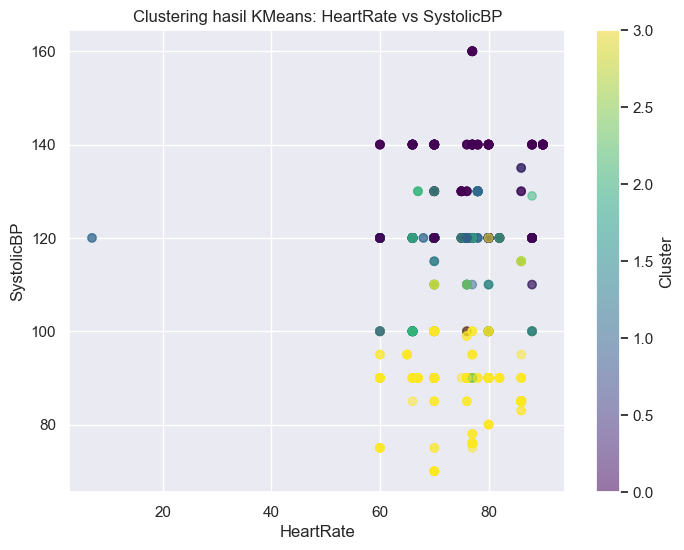

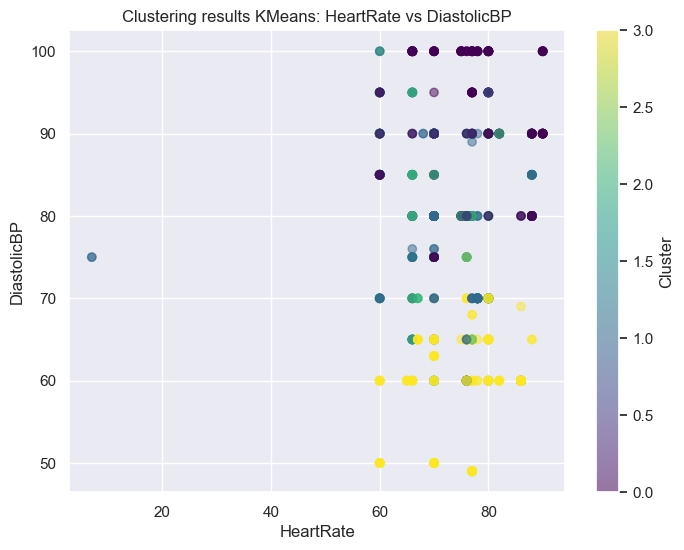

In [39]:
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose the features for visualization
feature1 = 'HeartRate'
feature2_1 = 'SystolicBP'
feature2_2 = 'DiastolicBP'

# Plotting the scatter plot for HeartRate vs SystolicBP
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2_1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering hasil KMeans: HeartRate vs SystolicBP')
plt.xlabel(feature1)
plt.ylabel(feature2_1)
plt.colorbar(label='Cluster')
plt.show()

# Plotting the scatter plot for HeartRate vs DiastolicBP
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2_2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering results KMeans: HeartRate vs DiastolicBP')
plt.xlabel(feature1)
plt.ylabel(feature2_2)
plt.colorbar(label='Cluster')
plt.show()

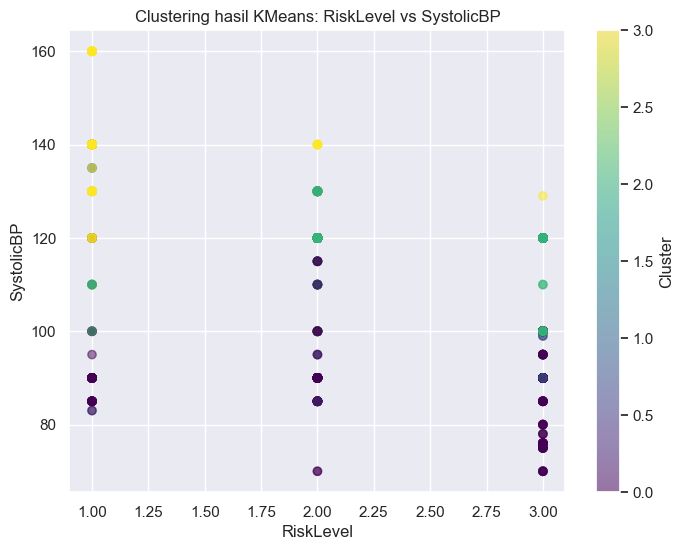

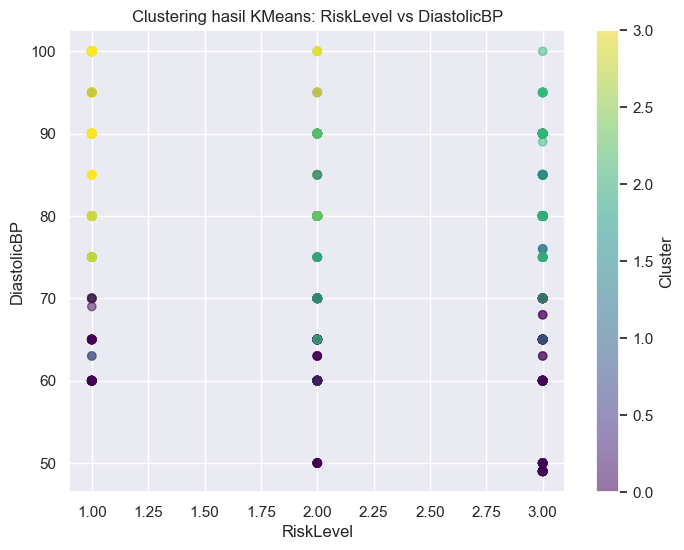

In [40]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose the features for visualization
feature1 = 'RiskLevel'
feature2_1 = 'SystolicBP'
feature2_2 = 'DiastolicBP'

# Plotting the scatter plot for HeartRate vs SystolicBP
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2_1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering hasil KMeans: RiskLevel vs SystolicBP')
plt.xlabel(feature1)
plt.ylabel(feature2_1)
plt.colorbar(label='Cluster')
plt.show()

# Plotting the scatter plot for HeartRate vs DiastolicBP
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2_2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering hasil KMeans: RiskLevel vs DiastolicBP')
plt.xlabel(feature1)
plt.ylabel(feature2_2)
plt.colorbar(label='Cluster')
plt.show()

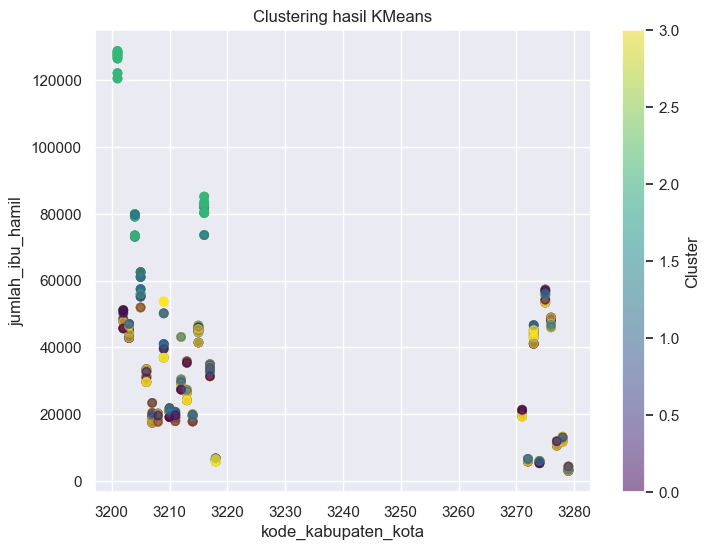

In [41]:

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Choose two features for visualization
feature1 = 'kode_kabupaten_kota'
feature2 = 'jumlah_ibu_hamil'

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering hasil KMeans')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster')
plt.show()

In [42]:
# silhouette

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)

print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.6640354428239688


In [43]:
#Davies-Bouldin Index

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
cluster_labels = kmeans.labels_


davies_bouldin = davies_bouldin_score(X, cluster_labels)
print("The Davies-Bouldin Index is:", davies_bouldin)

The Davies-Bouldin Index is: 0.349146096009746


In [44]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scaled_X, X['cluster'])
print(f'Calinski-Harabasz Index: {ch_index}')


Calinski-Harabasz Index: 244.4729328273067


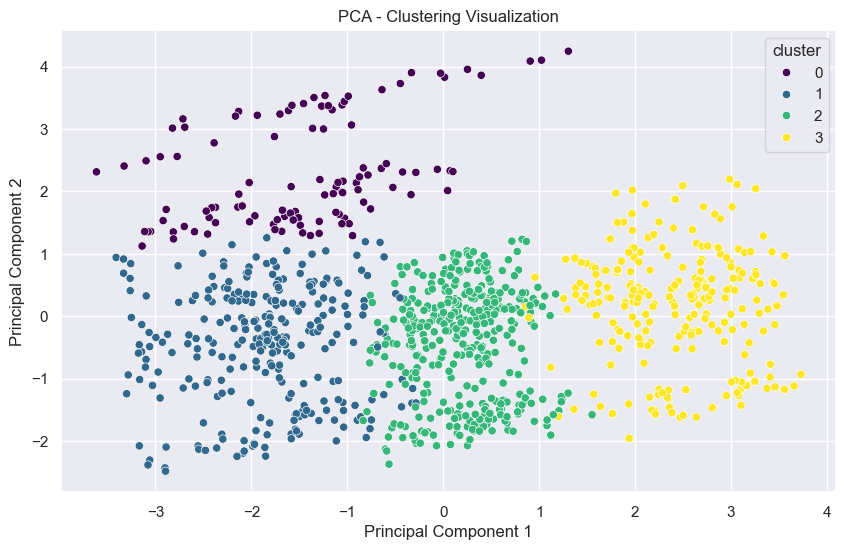

In [45]:
## PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = X['cluster']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('PCA - Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


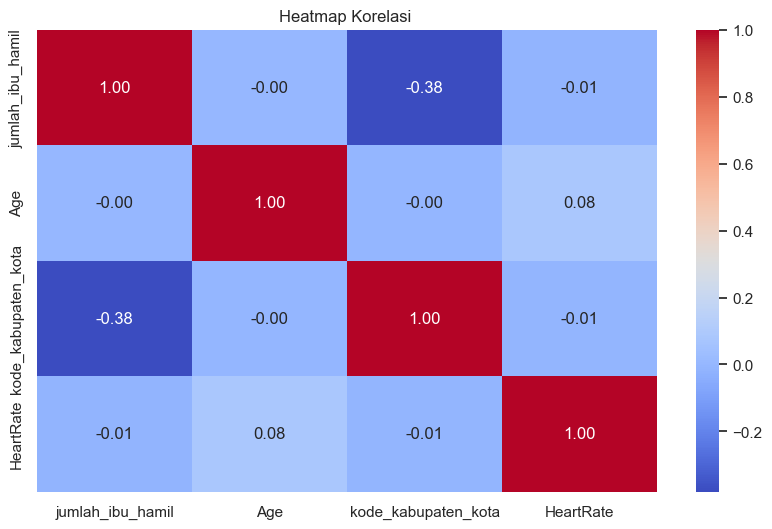

In [46]:
data_to_visualize = X[['jumlah_ibu_hamil', 'Age', 'kode_kabupaten_kota', 'HeartRate']]

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data_to_visualize.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Heatmap Korelasi ')
plt.show()


### Evalusi


In [47]:
cluster_summary = X.groupby('cluster').mean()
print(cluster_summary)

               Age  jumlah_ibu_hamil  SystolicBP  DiastolicBP  \
cluster                                                         
0        28.046296      92448.953704  111.500000    74.074074   
1        21.693431      28810.434307   89.843066    60.496350   
2        28.191214      26273.811370  118.552972    79.560724   
3        42.477551      32855.326531  131.608163    90.469388   

         kode_kabupaten_kota        tahun  RiskLevel  HeartRate  
cluster                                                          
0                3206.166667  2018.509259   2.287037  73.574074  
1                3233.905109  2018.978102   2.339416  76.255474  
2                3235.914729  2018.966408   2.534884  71.723514  
3                3230.885714  2018.681633   1.195918  76.510204  


In [48]:
cluster_distribution = X['cluster'].value_counts()
print(cluster_distribution)

cluster
2    387
1    274
3    245
0    108
Name: count, dtype: int64


In [49]:
## analisis statisitk
cluster_summary = X.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Menampilkan hasil analisis statistik untuk setiap cluster
print(cluster_summary)

               Age                           jumlah_ibu_hamil           \
              mean median        std min max             mean   median   
cluster                                                                  
0        28.046296   23.0  12.366963  12  65     92448.953704  80374.0   
1        21.693431   17.5  11.047392  10  70     28810.434307  22564.0   
2        28.191214   25.0  11.052612  12  62     26273.811370  21113.0   
3        42.477551   42.0  10.783094  17  65     32855.326531  31319.0   

                                      ... RiskLevel                           \
                  std    min     max  ...      mean median       std min max   
cluster                               ...                                      
0        26378.298779  46520  128743  ...  2.287037    2.0  0.724097   1   3   
1        18237.546754   2974   81869  ...  2.339416    3.0  0.759396   1   3   
2        15525.847241   2966   57307  ...  2.534884    3.0  0.544114   1   3   
3